In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab_Notebooks/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning//DATA/fake_reg.csv')

In [5]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [6]:
# Trying to predict the price according to feature1 and feature2 (regression model)

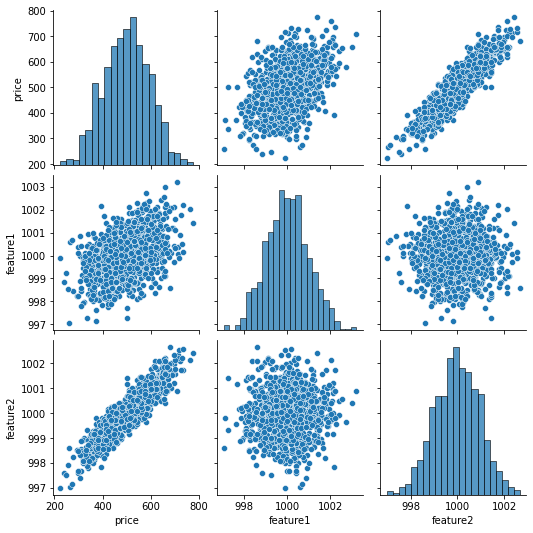

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split

# TensorFlow requuires numpy arrays and not dataframes or series. 

# Convert the features and label series to arrays
X = df[['feature1','feature2']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
# Normalize and scale the feature data for the prediction model
from sklearn.preprocessing import MinMaxScaler
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [13]:

# As a list of layers inside the Sequantial NN model
model = Sequential([Dense(units=2),
                    Dense(units=2),
                    Dense(units=2)])

# Adding the layers one by one (gives better control)
model = Sequential()
model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

# These two methods will produce the same NN model

In [14]:
# Building the actual model for this excercise
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Adding the final output node of the NN model
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [15]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256693.1250
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256636.5469
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256574.1875
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256501.9844
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256419.4688
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256325.4375
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256218.2656
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256096.9844
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255959.9531
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255806.1562
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255635.2969
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [16]:
df = pd.DataFrame(model.history.history)

In [17]:
df.head()

,loss
0,256693.125000
1,256636.546875
2,256574.187500
3,256501.984375
4,256419.468750


Text(0.5, 1.0, 'Loss vs epoch')

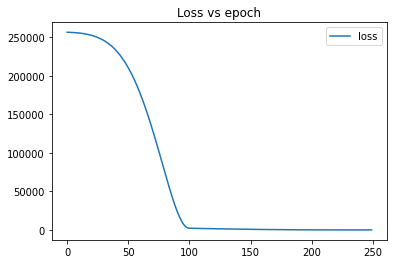

In [18]:
import matplotlib.pyplot as plt
df.plot()
plt.title('Loss vs epoch')
# This is very tipical for NN to get very high loss for the first epochs and 
# then steeply reduce the error by training acording to the training dataset